# JC3503 Assignment - Student Records

---

Student Name: Jiaxu Li

Student Email: u25jl21@abdn.ac.uk

Student ID: 50079685

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

# Data loading

In [649]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt


# Import the data
df = pd.read_csv("student_records.csv", low_memory=False)

Have a brief look at the data， and find out there are 4424 rows and 37 columns in this dataset.


In [650]:
df.shape

(4424, 37)

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The DataFrame's memory usage is approximately 1.2 MB, including 37 columns in 3 data types(int64：29，float64: 7，object: 1) and none of them contain missing values. To be more specific, the data types of first 5 and last 5 rows are as follows:

In [652]:
df.head() # first 5 rows

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [653]:
df.tail() # last 5 rows

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


# Data cleaning

According to the reference link (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)
the dataset have been cleaned rigorously for anomalies, unexplainable outliers, and missing values. so, below we just perform routine checks just in case.

Check for duplicates, find out there is no duplicate

In [654]:
df.duplicated().sum() # check duplicated rows

0

Check for missing values, find out there is no missing values in the dataset

In [655]:
df.isnull().sum() # check missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

check for outliers, find out there is no outliers in the dataset


In [656]:
df.describe() # check the range of each column

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


previous qualification (grade between 0 and 200) 


Semester (grade between 0 and 20)



In [657]:
df.describe(include=object)


,Target
count,4424
unique,3
top,Graduate
freq,2209


In [658]:
df['Target'].value_counts() # check the distribution of Target column

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

# Data preprocessing

To analyze the data, we need to convert the some quantitative variables into categorical bucket.

In [659]:
df.shape

(4424, 37)

In [660]:
# Define the age buckets
age_buckets = [10, 19, 29, 39, 49, 59, 100]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['age'] = pd.cut(df['Age at enrollment'], age_buckets, labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])

# df = df.drop('Age at enrollment', axis=1)



In [661]:
# Define the  Unemployment rate buckets
unemploy_buckets = [7, 10, 14, 17]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['Unemployment_rate'] = pd.cut(df['Unemployment rate'], unemploy_buckets, labels=['7-10', '11-14', '15-17'])

# df = df.drop('Unemployment rate', axis=1)



In [662]:
# Define the Inflation rate buckets
Inflation_buckets = [-1, 0, 1, 2, 3, 4]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['Inflation_rate'] = pd.cut(df['Inflation rate'], Inflation_buckets, labels=['-1-0', '0-1', '1-2', '2-3', '3-4'])

# df = df.drop('Inflation rate', axis=1)



In [663]:
# Define the GDP rate buckets
GDP_buckets = [-4.5, -2, 0, 2, 4]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['GDP_rate'] = pd.cut(df['GDP'], GDP_buckets, labels=['-4- -2', '-2-0', '0-2', '2-4'])

# df = df.drop('GDP', axis=1)



In [664]:
# Define the pre_qual rate buckets
pre_qual_buckets = [94, 112, 132, 152, 200]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['pre_qualification'] = pd.cut(df['Previous qualification (grade)'], pre_qual_buckets, labels=['95-112', '112-132', '132-152', '152-200'])

# df = df.drop('Previous qualification (grade)', axis=1)


In [665]:
# Define the pre_qual rate buckets
C1_buckets = [-1, 5, 10, 15, 20]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['C1_grade'] = pd.cut(df['Curricular units 1st sem (grade)'], C1_buckets, labels=['0-4', '5-9', '10-14', '15-19'])

# df = df.drop('Curricular units 1st sem (grade)', axis=1)

In [666]:
# Define the pre_qual rate buckets
C2_buckets = [-1, 5, 10, 15, 20]  # Only upper bounds for each bucket

# Replace the original age values with the bucket labels
df['C2_grade'] = pd.cut(df['Curricular units 2nd sem (grade)'], C2_buckets, labels=['0-4', '5-9', '10-14', '15-19'])
 
# df = df.drop('Curricular units 2nd sem (grade)', axis=1)

In [667]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Inflation rate,GDP,Target,age,Unemployment_rate,Inflation_rate,GDP_rate,pre_qualification,C1_grade,C2_grade
0,1,17,5,171,1,1,122.0,1,19,12,...,1.4,1.74,Dropout,20-29,11-14,1-2,0-2,112-132,0-4,0-4
1,1,15,1,9254,1,1,160.0,1,1,3,...,-0.3,0.79,Graduate,10-19,11-14,-1-0,0-2,152-200,10-14,10-14
2,1,1,5,9070,1,1,122.0,1,37,37,...,1.4,1.74,Dropout,10-19,11-14,1-2,0-2,112-132,0-4,0-4
3,1,17,2,9773,1,1,122.0,1,38,37,...,-0.8,-3.12,Graduate,20-29,7-10,-1-0,-4- -2,112-132,10-14,10-14
4,2,39,1,8014,0,1,100.0,1,37,38,...,-0.3,0.79,Graduate,40-49,11-14,-1-0,0-2,95-112,10-14,10-14


In [668]:
# check for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# Data visualization

In [669]:
df.dtypes

Marital status                                       int64
Application mode                                     int64
Application order                                    int64
Course                                               int64
Daytime/evening attendance\t                         int64
Previous qualification                               int64
Previous qualification (grade)                     float64
Nacionality                                          int64
Mother's qualification                               int64
Father's qualification                               int64
Mother's occupation                                  int64
Father's occupation                                  int64
Admission grade                                    float64
Displaced                                            int64
Educational special needs                            int64
Debtor                                               int64
Tuition fees up to date                              int

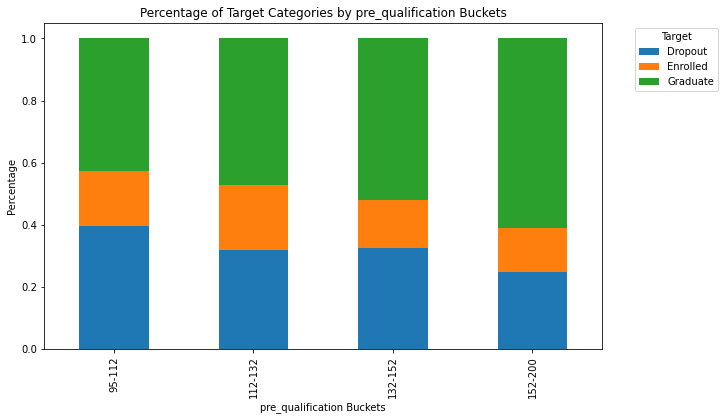

In [670]:
counts = df.groupby(['pre_qualification', 'Target']).size().unstack(fill_value=0)
# compute the total number of records in each grade bucket
total_counts = counts.sum(axis=1)

# compute the percentage of each target category in each grade bucket
percentage_counts = counts.div(total_counts, axis=0)
percentage_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('pre_qualification Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Target Categories by pre_qualification Buckets')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


According to the bar chart, the percentage of graduate is higher and percentage of Dropout is lower while the pre_qualification is high, however, the differences are not obvious, which means there is a light positive correlation between the pre_qualification and the target.

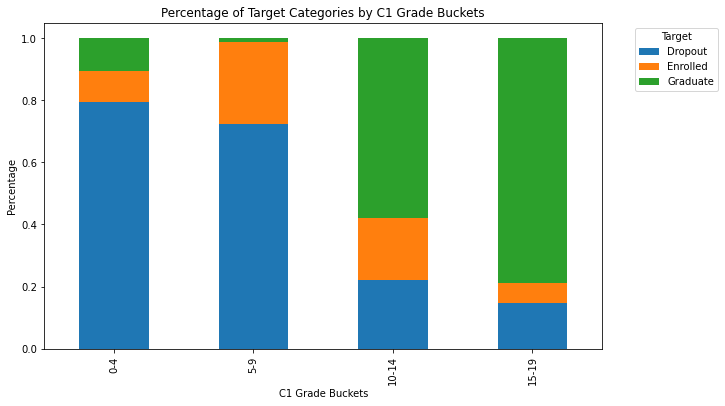

In [671]:
grade_target_counts = df.groupby(['C1_grade', 'Target']).size().unstack(fill_value=0)
# compute the total number of records in each grade bucket
total_counts = grade_target_counts.sum(axis=1)

# compute the percentage of each target category in each grade bucket
percentage_counts = grade_target_counts.div(total_counts, axis=0)
percentage_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('C1 Grade Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Target Categories by C1 Grade Buckets')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


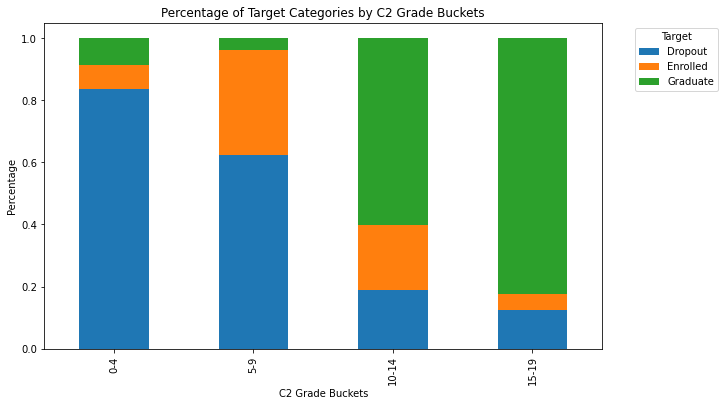

In [672]:
grade_target_counts = df.groupby(['C2_grade', 'Target']).size().unstack(fill_value=0)
# compute the total number of records in each grade bucket
total_counts = grade_target_counts.sum(axis=1)

# compute the percentage of each target category in each grade bucket
percentage_counts = grade_target_counts.div(total_counts, axis=0)
percentage_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('C2 Grade Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Target Categories by C2 Grade Buckets')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2 bar tables are very similar, which shows that higher grade can increase the percentage of graduate, while lower percentage of Dropout. the student who have a medium grade have a higher percentage of choosing Enrolled. 

Grade is very important factor for the target.



In [673]:

counts = df.groupby(['Inflation_rate', 'Target']).size()

# compute the total number of records in each grade bucket
total_counts = counts.sum(level=0)

# compute the sum of each target category in each grade bucket
percentage_counts = counts.div(total_counts, level=0)

percentage_counts

Inflation_rate  Target  
-1-0            Dropout     0.316360
                Enrolled    0.187432
                Graduate    0.496208
0-1             Dropout     0.297297
                Enrolled    0.166257
                Graduate    0.536446
1-2             Dropout     0.318029
                Enrolled    0.187010
                Graduate    0.494961
2-3             Dropout     0.352273
                Enrolled    0.194215
                Graduate    0.453512
3-4             Dropout     0.336516
                Enrolled    0.150358
                Graduate    0.513126
dtype: float64

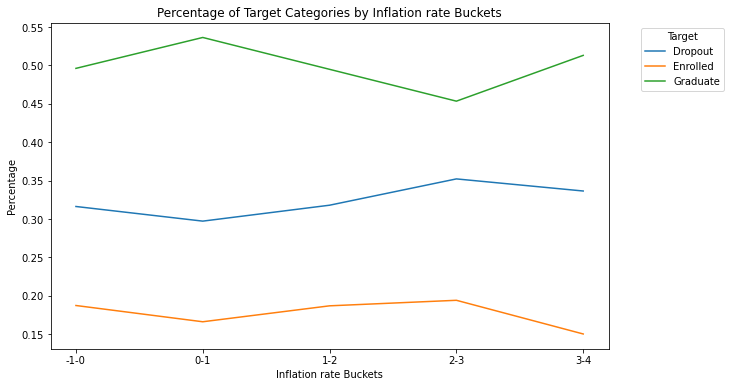

In [674]:


percentage_counts = pd.Series({
    ('-1-0', 'Dropout'): 0.316360,
    ('-1-0', 'Enrolled'): 0.187432,
    ('-1-0', 'Graduate'): 0.496208,
    ('0-1', 'Dropout'): 0.297297,
    ('0-1', 'Enrolled'): 0.166257,
    ('0-1', 'Graduate'): 0.536446,
    ('1-2', 'Dropout'): 0.318029,
    ('1-2', 'Enrolled'): 0.187010,
    ('1-2', 'Graduate'): 0.494961,
    ('2-3', 'Dropout'): 0.352273,
    ('2-3', 'Enrolled'): 0.194215,
    ('2-3', 'Graduate'): 0.453512,
    ('3-4', 'Dropout'): 0.336516,
    ('3-4', 'Enrolled'): 0.150358,
    ('3-4', 'Graduate'): 0.513126,
})

percentage_counts = percentage_counts.reset_index()
percentage_counts.columns = ['Inflation_rate', 'Target', 'Percentage']


plt.figure(figsize=(10, 6))
sns.lineplot(data=percentage_counts, x='Inflation_rate', y='Percentage', hue='Target')
plt.xlabel('Inflation rate Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Target Categories by Inflation rate Buckets')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


According to this line gragh, inflation rate doesn't shows an obvious relationship with the target.



In [675]:

counts = df.groupby(['GDP_rate', 'Target']).size()

# compute the sum of each target category in each grade bucket
total_counts = counts.sum(level=0)

# compute the percentage of each target category in each grade bucket
percentage_counts = counts.div(total_counts, level=0)

percentage_counts

GDP_rate  Target  
-4- -2    Dropout     0.336559
          Enrolled    0.191398
          Graduate    0.472043
-2-0      Dropout     0.358515
          Enrolled    0.139565
          Graduate    0.501921
0-2       Dropout     0.315381
          Enrolled    0.187985
          Graduate    0.496634
2-4       Dropout     0.280051
          Enrolled    0.184143
          Graduate    0.535806
dtype: float64

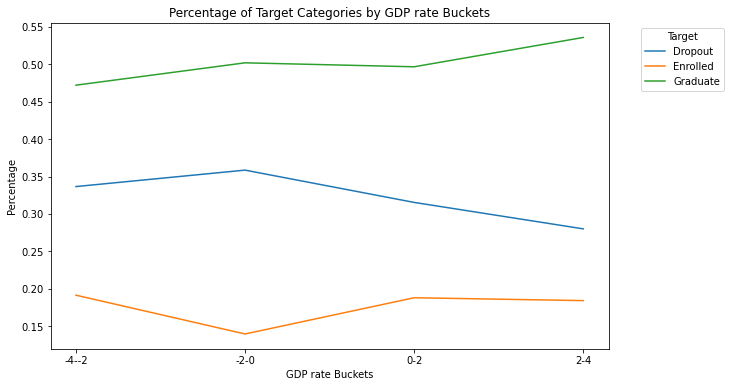

In [676]:
percentage_counts = pd.Series({
    ('-4--2', 'Dropout'): 0.336559,
    ('-4--2', 'Enrolled'): 0.191398,
    ('-4--2', 'Graduate'): 0.472043,
    ('-2-0', 'Dropout'): 0.358515,
    ('-2-0', 'Enrolled'): 0.139565,
    ('-2-0', 'Graduate'): 0.501921,
    ('0-2', 'Dropout'): 0.315381,
    ('0-2', 'Enrolled'): 0.187985,
    ('0-2', 'Graduate'): 0.496634,
    ('2-4', 'Dropout'): 0.280051,
    ('2-4', 'Enrolled'): 0.184143,
    ('2-4', 'Graduate'): 0.535806,
})
percentage_counts = percentage_counts.reset_index()
percentage_counts.columns = ['GDP_rate', 'Target', 'Percentage']


plt.figure(figsize=(10, 6))
sns.lineplot(data=percentage_counts, x='GDP_rate', y='Percentage', hue='Target')
plt.xlabel('GDP rate Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Target Categories by GDP rate Buckets')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


According to this line gragh, while Graduate percentage shows increasing trend and Dropout percentage is decrease when GDP grows, it doesn't show an obvious relationship with the Enrolled percentage. So GDP rate might be a factor to predict target. 

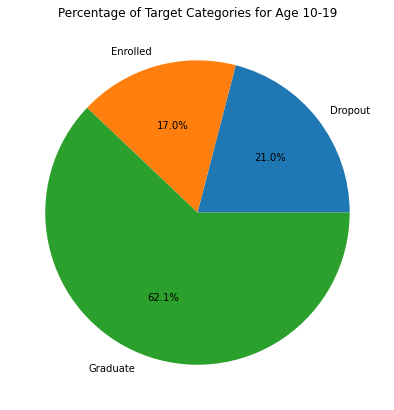

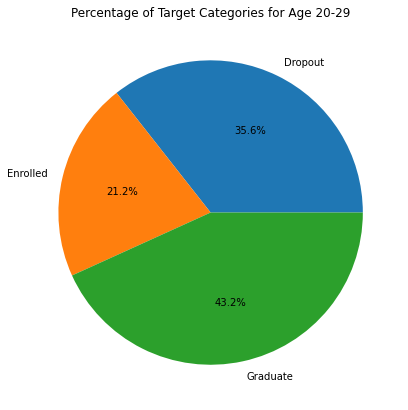

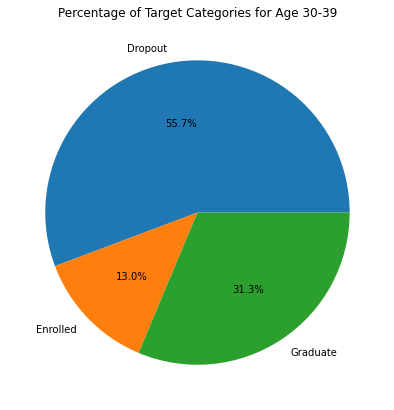

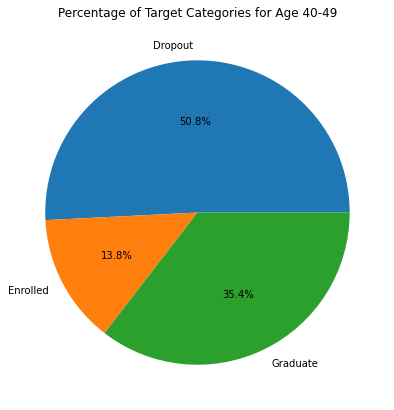

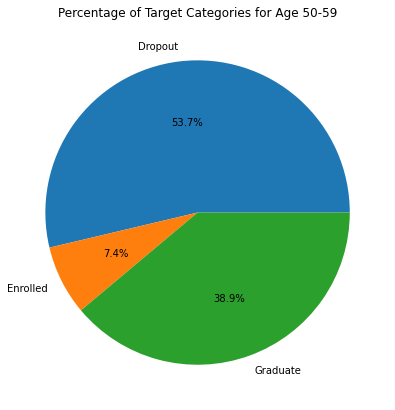

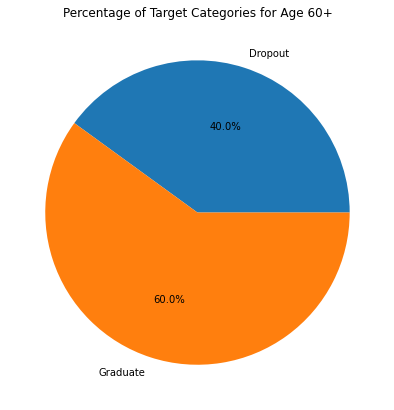

In [677]:

# Set the background color of the chart to white
plt.rcParams['figure.facecolor'] = 'white'

# Group the data by age
age_groups = df.groupby('age')

# Iterate over each age group and plot a pie chart
for age, group_data in age_groups:
    # Group the data by Target within the age group and compute the size of each group
    counts = group_data.groupby('Target').size()
    
    # Compute the total count of each target category in the age group
    total_counts = counts.sum()
    
    # Compute the percentage of each target category in the age group
    percentage_counts = counts / total_counts
    
    # Plot the pie chart with percentages
    percentage_counts.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
    
    # Set the title of the chart
    plt.title(f'Percentage of Target Categories for Age {age}')
    
    # Remove the y-label
    plt.ylabel('')
    
    # Show the plot
    plt.show()


According to the pie charts, the percentage of Graduate and Dropout in each age group is different. The younger the student are, the higher percentage of Graduate it shows. So age is a neccessary factor to predict target.

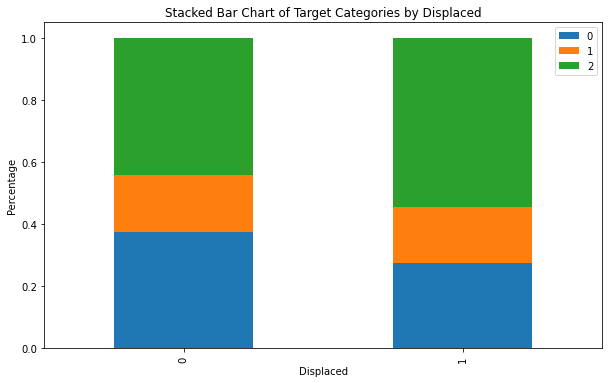

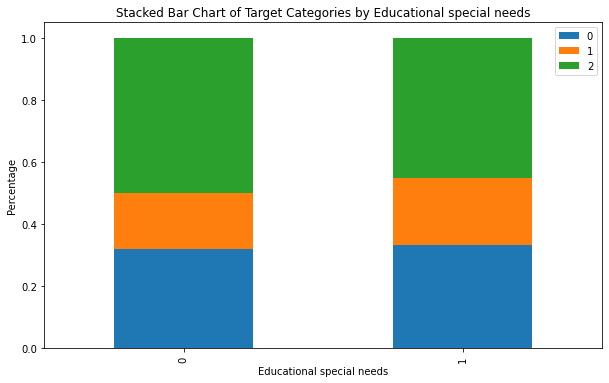

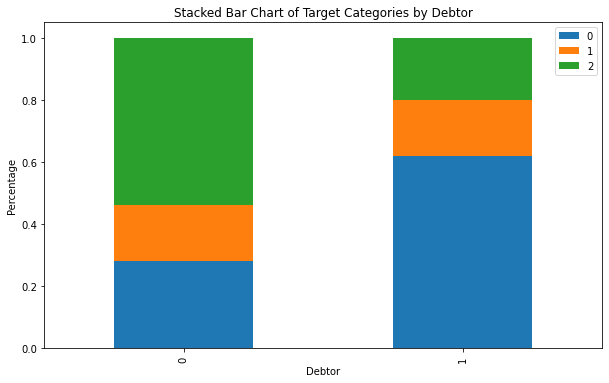

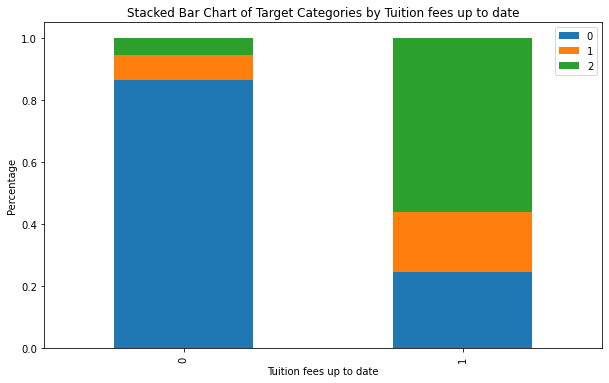

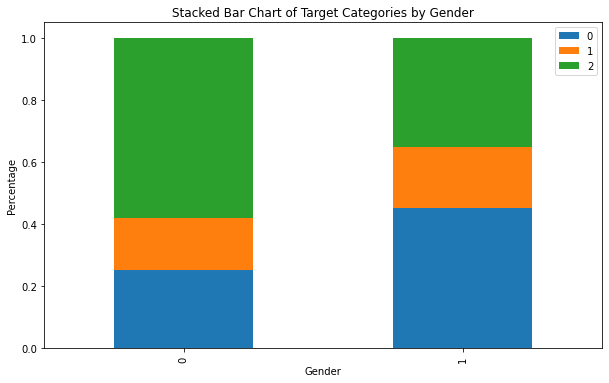

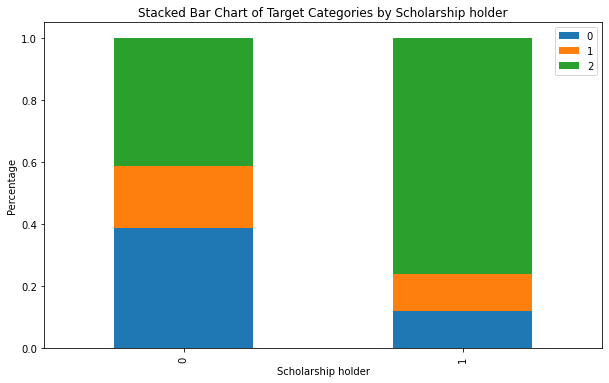

In [678]:
def plot_categorical_bar_chart(df, category_name):
    plt.rcParams['figure.facecolor'] = 'white'
    cate_groups = df.groupby(f'{category_name}')

    target_counts = {}

    for i, group_data in cate_groups:
        counts = group_data.groupby('Target').size()
        total_counts = counts.sum()
        percentage_counts = counts / total_counts
        target_counts[i] = percentage_counts.values  
       
    target_counts_df = pd.DataFrame(target_counts).T  

    target_counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Stacked Bar Chart of Target Categories by {category_name}')
    plt.xlabel(f'{category_name}')
    plt.ylabel('Percentage')

    plt.show()

for category in ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender','Scholarship holder']:
    plot_categorical_bar_chart(df, category)



Among the above 6 categories, 'Displaced', 'Educational special needs' are the least correlation with target classification. while,'Debtor', 'Tuition fees up to date', 'Gender','Scholarship holder' 4 categories show great effect on the percentage of target categories, which shows great different distributtion in left and right bar.

So the category of 'Debtor', 'Tuition fees up to date', 'Gender','Scholarship holder might be factors to predict target.



Based on the EDA, we can conclude the factors for prediction are:
1. GDP rate might be a factor to predict target.
2. Age is a neccessary factor to predict target.
3. C1 and C2 grade are factors to predict target.
4. Previous qualification (grade) 
5. Debtor, Tuition fees up to date, Gender, Scholarship holder are factors to predict target.



# Build the model

In [679]:
# extract features from the dataframe
ndf = df[['GDP','Previous qualification (grade)', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder','Target']]
ndf

,GDP,Previous qualification (grade),Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Debtor,Tuition fees up to date,Gender,Scholarship holder,Target
0,1.74,122.0,20,0.000000,0.000000,0,1,1,0,Dropout
1,0.79,160.0,19,14.000000,13.666667,0,0,1,0,Graduate
2,1.74,122.0,19,0.000000,0.000000,0,0,1,0,Dropout
3,-3.12,122.0,20,13.428571,12.400000,0,1,0,0,Graduate
4,0.79,100.0,45,12.333333,13.000000,0,1,0,0,Graduate
...,...,...,...,...,...,...,...,...,...,...
4419,-4.06,125.0,19,13.600000,12.666667,0,1,1,0,Graduate
4420,2.02,120.0,18,12.000000,11.000000,1,0,0,0,Dropout
4421,0.79,154.0,30,14.912500,13.500000,0,1,0,1,Dropout
4422,-3.12,180.0,20,13.800000,12.000000,0,1,0,1,Graduate


MLP

Iteration 1, loss = 0.92677542
Iteration 2, loss = 0.77456286
Iteration 3, loss = 0.73810434
Iteration 4, loss = 0.71939813
Iteration 5, loss = 0.70744884
Iteration 6, loss = 0.69620605
Iteration 7, loss = 0.68783398
Iteration 8, loss = 0.68133998
Iteration 9, loss = 0.68099278
Iteration 10, loss = 0.67393355
Iteration 11, loss = 0.67082195
Iteration 12, loss = 0.66771029
Iteration 13, loss = 0.66443414
Iteration 14, loss = 0.66184766
Iteration 15, loss = 0.65936119
Iteration 16, loss = 0.65605285
Iteration 17, loss = 0.65436340
Iteration 18, loss = 0.65276569
Iteration 19, loss = 0.64977338
Iteration 20, loss = 0.64595385
Iteration 21, loss = 0.64705530
Iteration 22, loss = 0.64341605
Iteration 23, loss = 0.64377713
Iteration 24, loss = 0.64036140
Iteration 25, loss = 0.63730957
Iteration 26, loss = 0.63756074
Iteration 27, loss = 0.63562856
Iteration 28, loss = 0.63200160
Iteration 29, loss = 0.62859661
Iteration 30, loss = 0.62755542
Iteration 31, loss = 0.62899959
Iteration 32, los

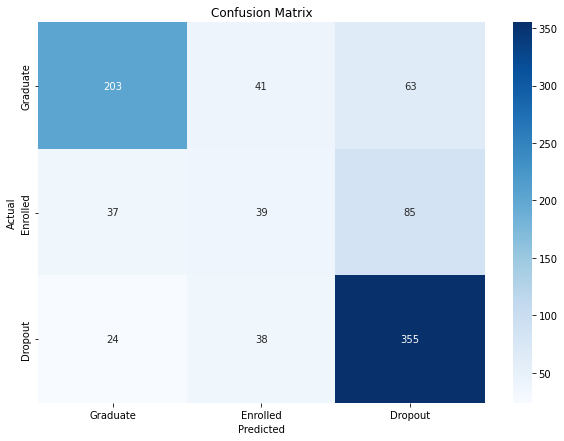

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.77      0.66      0.71       307
    Enrolled       0.33      0.24      0.28       161
     Dropout       0.71      0.85      0.77       417

    accuracy                           0.67       885
   macro avg       0.60      0.58      0.59       885
weighted avg       0.66      0.67      0.66       885



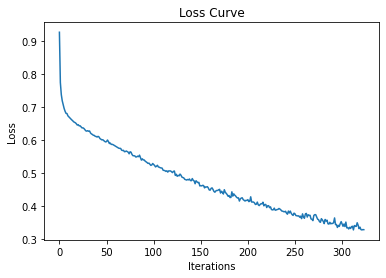

In [681]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume ndf is your dataframe containing features and target
# Split dataset into features and target
X = ndf.drop('Target', axis=1)
y = ndf['Target']

# If you have categorical features, you should encode them
# Example: Assume 'Gender' is a categorical feature in your DataFrame
categorical_features = ['Gender']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=9)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(80, 100, 40), activation='relu', max_iter=500, random_state=9, verbose=True)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Enrolled', 'Dropout'], yticklabels=['Graduate', 'Enrolled', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Graduate', 'Enrolled', 'Dropout'])
print("Classification Report:\n", report)

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


The model performs well in identifying 'Dropout' instances with a high recall of 85% and a good precision of 71%.
The 'Graduate' class also has a decent performance with an F1-score of 0.71.
The model struggles significantly with the 'Enrolled' class, with low precision (33%) and recall (24%). This suggests the model often confuses 'Enrolled' instances with other classes.
The overall accuracy of 67% indicates that there is room for improvement.

# SVM 
So I tried another algorithm, with the help of GPT

Accuracy: 0.6971751412429379
Confusion Matrix:
 [[211   2  94]
 [ 28   9 124]
 [ 16   4 397]]


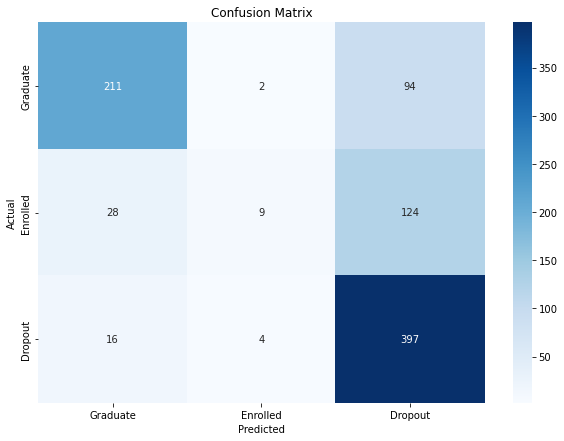

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.83      0.69      0.75       307
    Enrolled       0.60      0.06      0.10       161
     Dropout       0.65      0.95      0.77       417

    accuracy                           0.70       885
   macro avg       0.69      0.57      0.54       885
weighted avg       0.70      0.70      0.64       885



In [682]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume ndf is your dataframe containing features and target
# Split dataset into features and target
X = ndf.drop('Target', axis=1)
y = ndf['Target']

# If you have categorical features, you should encode them
# Example: Assume 'Gender' is a categorical feature in your DataFrame
categorical_features = ['Gender']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=9)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=9)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Enrolled', 'Dropout'], yticklabels=['Graduate', 'Enrolled', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Graduate', 'Enrolled', 'Dropout'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Graduate       0.83      0.69      0.75       307
    Enrolled       0.60      0.06      0.10       161
     Dropout       0.65      0.95      0.77       417

    accuracy                           0.70       885
   macro avg       0.69      0.57      0.54       885
weighted avg       0.70      0.70      0.64       885

The SVM model shows an overall improvement compare with MLP model, which achieved an overall accuracy of 70% on the classification task, demonstrating strong performance in distinguishing 'Graduate' and 'Dropout' instances, with notable precision and recall scores. However, it still struggled significantly with the 'Enrolled' class, exhibiting poor recall and F1-score, suggesting challenges in correctly identifying these instances. The model excelled in recalling 'Dropout' instances, achieving a remarkable 95% recall rate, while also maintaining good precision.

# Random Forest

Accuracy: 0.7005649717514124
Confusion Matrix:
 [[218  24  65]
 [ 47  32  82]
 [ 25  22 370]]


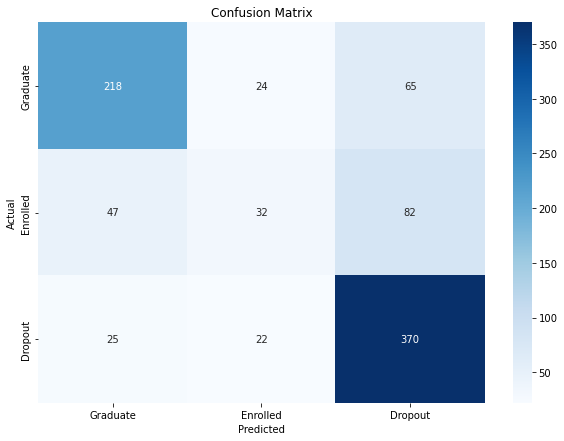

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.75      0.71      0.73       307
    Enrolled       0.41      0.20      0.27       161
     Dropout       0.72      0.89      0.79       417

    accuracy                           0.70       885
   macro avg       0.63      0.60      0.60       885
weighted avg       0.67      0.70      0.68       885



In [683]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume ndf is your dataframe containing features and target
# Split dataset into features and target
X = ndf.drop('Target', axis=1)
y = ndf['Target']

# If you have categorical features, you should encode them
# Example: Assume 'Gender' is a categorical feature in your DataFrame
categorical_features = ['Gender']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=9)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=9)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Enrolled', 'Dropout'], yticklabels=['Graduate', 'Enrolled', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Graduate', 'Enrolled', 'Dropout'])
print("Classification Report:\n", report)



Compared to the previous model, the Random Forest classifier achieved similar overall accuracy of 70%. It maintained strong precision and recall scores for the 'Graduate' and 'Dropout' classes, indicating consistent performance in correctly identifying these instances. However, it exhibited improvements in the recall of the 'Enrolled' class, increasing from 6% to 20%, though still relatively low. The F1-score for 'Enrolled' also showed a slight improvement from 0.10 to 0.27. Despite these enhancements, the model continues to struggle with the 'Enrolled' class compared to the other classes. The macro average precision, recall, and F1-score remained consistent, indicating stable performance across all classes. Further refinement may be necessary to address the challenges in correctly classifying 'Enrolled' instances and achieve a more balanced performance across all classe